c:\python34\lib\site-packages\matplotlib\scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


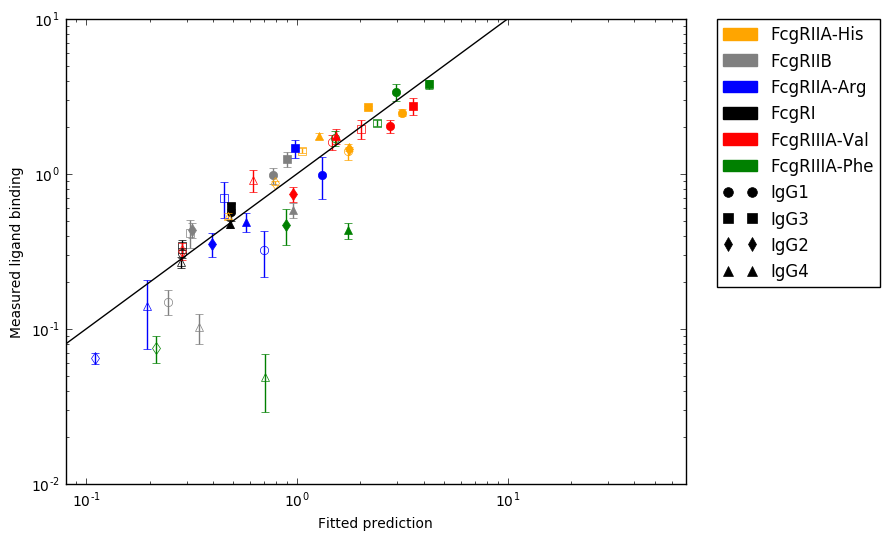

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import StoneHelper
import StoneModel

importlib.reload(StoneHelper)
importlib.reload(StoneModel)

M, dset = StoneHelper.read_chain("mcmc_chain.h5")

bestIDX = np.argmax(dset['LL'])

p = dset.iloc[bestIDX,:][2:].as_matrix()

StoneHelper.plotFit(StoneHelper.getFitMeasMergedSummarized(M, p))

c:\python34\lib\site-packages\matplotlib\scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


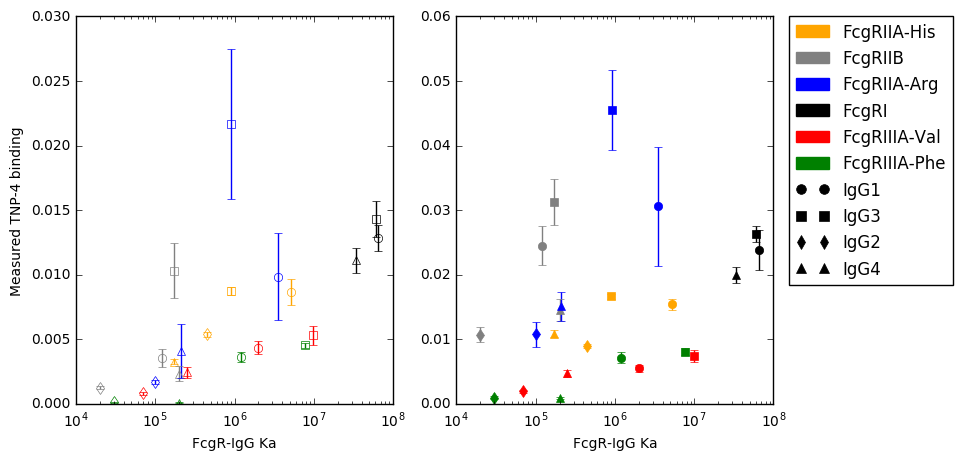

In [2]:
StoneHelper.plotNormalizedBindingvsKA(StoneHelper.getFitMeasMergedSummarized(M, p))

c:\python34\lib\site-packages\matplotlib\scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


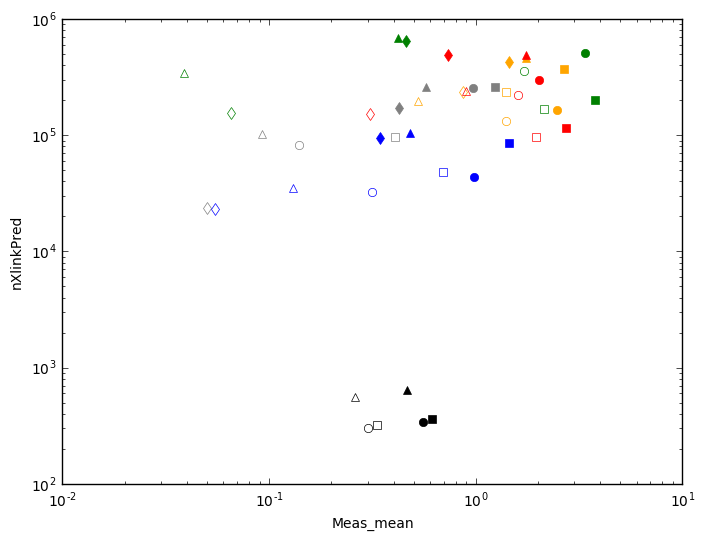

In [3]:
StoneHelper.plotQuant(StoneHelper.getFitMeasMergedSummarized(M, p), 'Meas_mean', 'nXlinkPred')

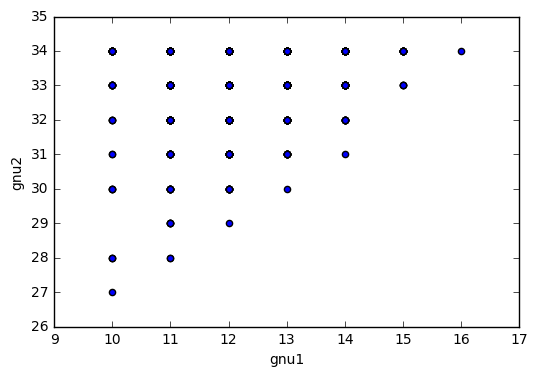

In [4]:
goodFits = dset[dset['LL'] > max(dset['LL'])-2]

goodFits.plot('gnu1', 'gnu2', 'scatter')

In [5]:
(fitFrame).to_csv("out.csv")

#fitFrame.plot('Ka', 'LbndPred', 'scatter', loglog = True)

NameError: name 'fitFrame' is not defined

In [ ]:
from sklearn import preprocessing

goodFits2 = goodFits.iloc[:,2:8]

#goodFits2 = goodFits2.apply(lambda V: preprocessing.scale(V,axis=0,with_mean=True, with_std=True,copy=False),axis=1)

goodFits2.plot()

In [ ]:
plt.plot(dset['LL'][1:3000])

In [ ]:
StoneHelper.mfiAdjMeanFigureMaker(M)

In [ ]:
StoneHelper.FcgRQuantificationFigureMaker(M)